In [9]:
from compare_semi_supervised_clustering import *


In [3]:
    # Prepare the MNIST data
    x_train, y_train, x_test, y_test = load_data("cifar10")
    percentages = [0.02, 0.05, 0.1, 0.2, 0.5]
    rounds = 5

    # Initialize the main list to store accuracies of all methods
    methods_accs = []

    # List of methods
    methods = [SemiSupervisedGMM, CopKMean, LabelPropagation, SVC]

    for Method in tqdm(methods, desc="methods"):
        accs = []  # Temporarily store accuracies for the current method
        for percentage in tqdm(percentages, desc=">> percentages"):
            accs_round = []
            for _ in tqdm(range(rounds), desc="rounds"):
                # Prepare labeled and unlabeled data
                labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(
                    x_train, y_train, percentage=percentage)
                X = np.concatenate((labeled_data, unlabeled_data), axis=0)
                label_assignments = list(labeled_labels) + list(unlabeled_labels)

                if Method is SemiSupervisedGMM:
                    model = Method(n_components=10)
                    model.fit(X, labeled_data, labeled_labels)
                elif Method is CopKMean:
                    model = Method(n_components=10)
                    model.fit(X, labeled_labels)
                elif Method is LabelPropagation:
                    model = Method()
                    model.fit(X, np.concatenate((labeled_labels, [-1] * len(unlabeled_labels))))
                else:  # SVM
                    model = Method()
                    model.fit(labeled_data, labeled_labels)

                # Predict cluster assignments
                cluster_assignments = model.predict(X)

                # Calculate and append accuracy
                accs_round.append(clustering_accuracy(label_assignments, cluster_assignments))

            accs.append(accs_round)

        # Append the accuracies of the current method to the main list
        methods_accs.append(accs)

>> percentages:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:01<00:04,  1.19s/it]

rounds:  40%|████      | 2/5 [00:03<00:04,  1.55s/it]

rounds:  60%|██████    | 3/5 [00:05<00:03,  1.68s/it]

rounds:  80%|████████  | 4/5 [00:06<00:01,  1.47s/it]

rounds: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

>> percentages:  20%|██        | 1/5 [00:07<00:30,  7.58s/it]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:01<00:04,  1.21s/it]

rounds:  40%|████      | 2/5 [00:02<00:03,  1.19s/it]

rounds:  60%|██████    | 3/5 [00:03<00:02,  1.22s/it]

rounds:  80%|████████  | 4/5 [00:04<00:01,  1.22s/it]

rounds: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]

>> percentages:  40%|████      | 2/5 [00:13<00:21,  7.10s/it]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]

rounds:  20%|██        | 1/5 [00:02<00:11,  2.96s/it]

rounds:  40%|████      | 2/5 [00:05<00:08,  2.72s/it]

rounds:  60%|█████

rounds:  60%|██████    | 3/5 [00:06<00:04,  2.32s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds:  80%|████████  | 4/5 [00:09<00:02,  2.30s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds: 100%|██████████| 5/5 [00:11<00:00,  2.29s/it]

>> percentages:  60%|██████    | 3/5 [00:35<00:23, 11.88s/it]

rounds:   0%|          | 0/5 [00:00<?, ?it/s]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


rounds:  20%|██        | 1/5 [00:02<00:08,  2.23s/it]/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-package

In [10]:
def plot_multi_method_accs(methods_accs, percentages, method_names):
    """
    Plot multiple methods' accuracies on a single chart.

    :param methods_accs: A list of lists containing accuracies for each method.
    :param percentages: The percentages of labeled data used.
    :param method_names: The names of the methods to be plotted.
    """
    percentage_labels = [f"{p * 100}%" for p in percentages]
    
    plt.figure(figsize=(10, 6))
    for method_acc, name in zip(methods_accs, method_names):
        # Calculate the mean accuracy for each percentage
        mean_accs = np.array([sum(acc_round) / len(acc_round) for acc_round in method_acc])
        std_accs = np.array([np.std(acc_round) for acc_round in method_acc])
        plt.plot(percentage_labels, mean_accs, label=name)
        plt.fill_between(percentage_labels, mean_accs - std_accs, mean_accs + std_accs, alpha=0.2)

    plt.xlabel('Percentage of Labeled Data')
    plt.ylabel('Clustering Accuracy')
    plt.title('Comparison of Semi-Supervised Clustering Methods')
    plt.legend()
    plt.grid(True)
    plt.show()


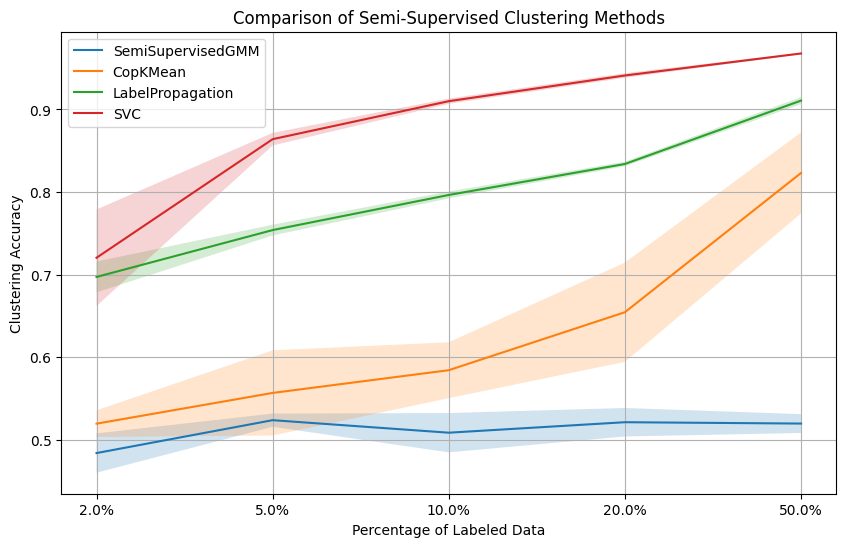

In [11]:
method_names = ['SemiSupervisedGMM', 'CopKMean', 'LabelPropagation', 'SVC']
plot_multi_method_accs(methods_accs, percentages, method_names)